In [1]:
## This script is to plot GPS sites for the 2021 field campaign V02
## created by C. Bayu Risanto, S.J. (5 December 2024)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from numpy import matlib
import netCDF4 as nc
import dateutil.parser
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mplotcolors
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj, transform
from copy import copy
import shapely.geometry as sgeom
from datetime import date, datetime, timedelta
## create ncfile opener
def read_nc(link,ncfile):
    fname = link+ncfile
    ds = nc.Dataset(fname)
    HGT = ds.variables['HGT'][:]
    lon = ds.variables['XLONG'][:]
    lat = ds.variables['XLAT'][:]
    return HGT,lon,lat

In [2]:
#get topography here
dir_in = '/home/bayu/DATA/ARIZONA_PRO/metadata/'
HGT,lon,lat = read_nc(dir_in,'HGT_d01.nc')
HGT = np.squeeze(HGT)
XLON = np.squeeze(lon)
XLAT = np.squeeze(lat)

In [3]:
xticks = np.arange(-115.,-109,1)
yticks = np.arange(31.,38.,1)
## create background
crs = ccrs.PlateCarree()
def plot_background(ax):
    ax.set_extent([-115.,-109.,31.,37.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=1.4,zorder=3)
    #ax.add_feature(cfeature.BORDERS,linestyle=':',linewidth=0.7,zorder=3)
    ax.add_feature(cfeature.STATES,linestyle=':',linewidth=0.9,zorder=3)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.set_xticklabels(xticks, rotation=0, fontsize=12)
    ax.set_yticklabels(yticks, rotation=0, fontsize=12)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    
    gl = ax.gridlines(ccrs.PlateCarree(),draw_labels=False,linewidth=2,color='gray',
                     alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = False; gl.ylines = False
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    
    return ax

In [4]:
# colormap set
#cmap = matplotlib.cm.terrain
vmin = 0
vmax = 3250
varval = np.arange(vmin,vmax,250)

In [5]:
# list of GPS-met sites here
path = '/home/bayu/DATA/ARIZONA_PRO/OBS/GPS_2021/'
meta = 'GPS_DAVID-SUOMI_sites_2021.txt'
with open(path+meta) as file:
    file_meta = file.readlines()
sites = []; lats = []; lons = []
for line in file_meta:
    parts = line.strip().split(' ') # Split the line using space as the delimiter
    if len(parts) == 4:
        stname = parts[3]
        lat_s = parts[1]
        lon_s = parts[0]
        sites.append(stname)
        lats.append(lat_s)
        lons.append(lon_s)
    elif len(parts) == 5:
        stname = parts[4]
        lat_s = parts[1]
        lon_s = parts[0]
        sites.append(stname)
        lats.append(lat_s)
        lons.append(lon_s)
    elif len(parts) == 6:
        stname = parts[5]
        lat_s = parts[1]
        lon_s = parts[0]
        sites.append(stname)
        lats.append(lat_s)
        lons.append(lon_s)

In [6]:
print(float(lats[2]))

36.908669


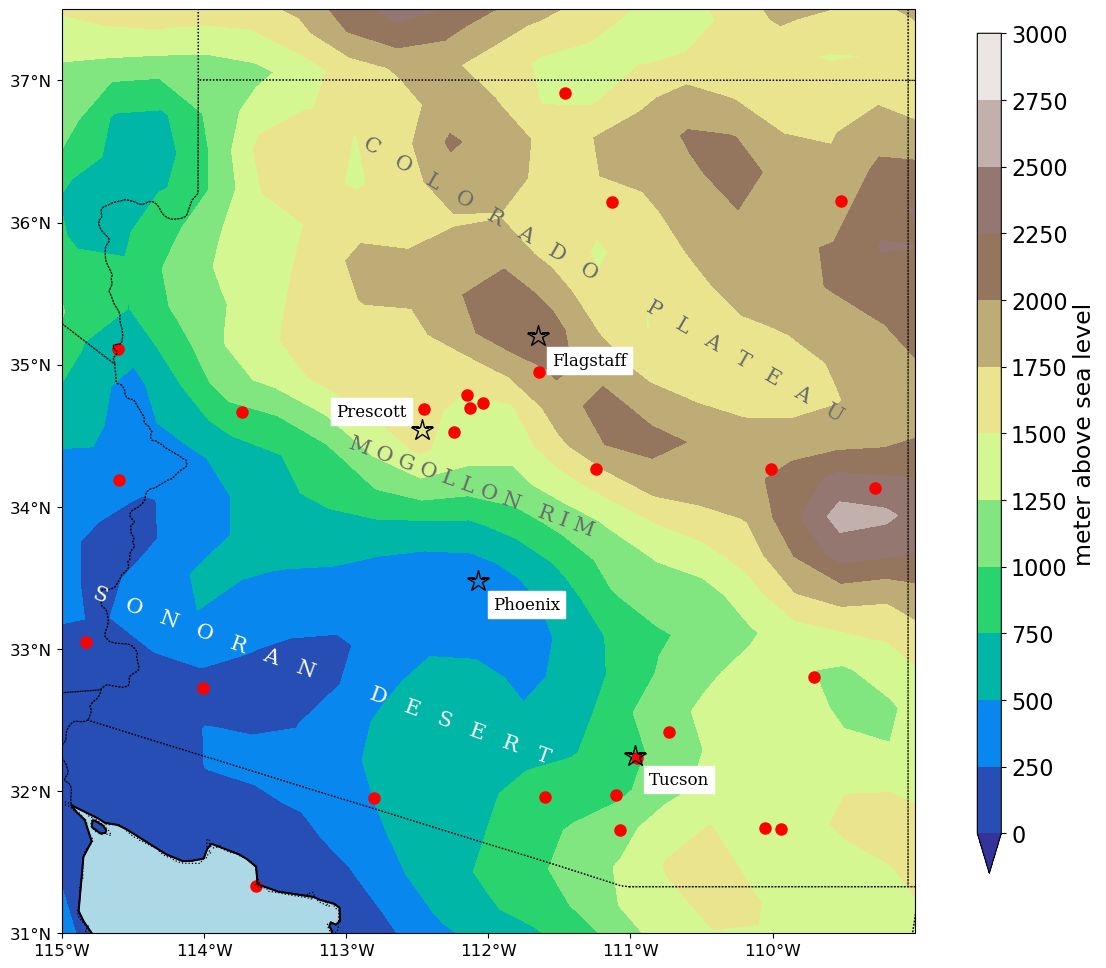

In [13]:
## PLOT
projection = ccrs.PlateCarree()
fig, ax1 = plt.subplots(1, 1, figsize=(12, 12),
                                   subplot_kw={'projection': projection})
## AX1
plot_background(ax1)

## plot terrae height
TOPOS1 = ax1.contourf(XLON,XLAT,HGT,
                      varval,cmap='terrain',extend='min',transform=projection)

ax1.add_feature(cfeature.OCEAN.with_scale('50m'), edgecolor='k', facecolor='lightblue', zorder=2)

#Add height colorbar
cax = fig.add_axes([0.92,0.16,0.02,0.7])
cax = fig.colorbar(TOPOS1,ticks=varval,cax=cax,orientation='vertical')
cax.ax.tick_params(labelsize=16)
cax.set_label('meter above sea level',fontsize=17)

## Scribere nomen GPS-met sitorum
for i in range(len(lons)):
    ax1.plot(float(lons[i]),float(lats[i]), 
             marker='o',color='r', markeredgecolor='r', markersize=8, transform=projection)
   # ax1.annotate(sites[i],(float(lons[i])-0.13,float(lats[i])+0.1),fontsize=9, fontname='serif',
    #        bbox=dict(boxstyle='square',fc='w',ec='w'))

lat_TUS = 32.25
lon_TUS = -110.97 
ax1.plot(lon_TUS,lat_TUS, marker='*',markerfacecolor='none', 
         markeredgecolor='k', markersize=16, transform=projection)
ax1.annotate('Tucson',(lon_TUS+0.1,lat_TUS-0.2),fontsize=12, fontname='serif',
             bbox=dict(boxstyle='square',fc='w',ec='w'))
lat_PHX = 33.48
lon_PHX = -112.07
ax1.plot(lon_PHX,lat_PHX, marker='*',markerfacecolor='none', 
         markeredgecolor='k', markersize=16, transform=projection)
ax1.annotate('Phoenix',(lon_PHX+0.1,lat_PHX-0.2),fontsize=12, fontname='serif',
             bbox=dict(boxstyle='square',fc='w',ec='w'))
lat_FGZ = 35.1983
lon_FGZ = -111.6513
ax1.plot(lon_FGZ,lat_FGZ, marker='*',markerfacecolor='none', 
         markeredgecolor='k', markersize=16, transform=projection)
ax1.annotate('Flagstaff',(lon_FGZ+0.1,lat_FGZ-0.2),fontsize=12, fontname='serif',
             bbox=dict(boxstyle='square',fc='w',ec='w'))
lat_PCT = 34.5394
lon_PCT = -112.4682
ax1.plot(lon_PCT,lat_PCT, marker='*',markerfacecolor='none', 
         markeredgecolor='k', markersize=16, transform=projection)
ax1.annotate('Prescott',(lon_PCT-0.6,lat_PCT+0.1),fontsize=12, fontname='serif',
             bbox=dict(boxstyle='square',fc='w',ec='w'))

# scribere nominae regionarum 
ax1.annotate('M O G O L L O N   R I M',(-113,33.8),ha='left',fontsize=15, rotation=-20, fontname='serif',color='dimgray')
ax1.annotate('C   O   L   O   R   A   D   O         P   L   A   T   E   A   U',(-112.9,34.6),
             ha='left',fontsize=15, rotation=-30,fontname='serif',color='dimgrey')
ax1.annotate('S   O   N   O   R   A   N         D   E   S   E   R   T',(-114.8,32.2),
             ha='left',fontsize=15, rotation=-20, fontname='serif',color='white')

## SAVE
dir_out = '/home/bayu/PLOTS/ARIZONA_PRO/maps/'
plotfile  = 'MAP_SITES.GPS2021.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

## CLOSE
plt.show()
plt.close()